## Travel Package Purchase Prediction

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.


### Customer details:

* CustomerID: Unique customer ID  
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)  
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [140]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
touristData = pd.read_excel('Tourism.xlsx', 'Tourism')
data = touristData.copy()
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
data.shape

(4888, 20)

In [4]:
data['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Observation : There are missing values in Columns 2,3,5,9,11,13,17,19

In [8]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

Observation: There are no duplicates

In [11]:
data["Age"].isnull()

0       False
1       False
2       False
3       False
4        True
        ...  
4883    False
4884    False
4885    False
4886    False
4887    False
Name: Age, Length: 4888, dtype: bool

In [21]:
data["Age"].value_counts()

35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
60.0     29
57.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

In [12]:
cat_columns = ["Occupation", "TypeofContact", "Gender", "ProductPitched", "MaritalStatus", "Designation"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************


In [17]:
data[data.Age.isnull()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,200011,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,200019,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,200020,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,200021,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2410,202410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2413,202413,1,NaN,Self Enquiry,3,21.0,Small Business,Male,2,5.0,Deluxe,3.0,Married,7.0,1,1,0,1.0,Manager,18423.0
2427,202427,1,NaN,Self Enquiry,3,22.0,Small Business,Male,3,3.0,Standard,3.0,Married,3.0,0,5,0,1.0,Senior Manager,18544.0
2430,202430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [18]:
data[data.Age.isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,226.0,NaN,NaN,NaN,201227.207965,690.368794,200004.0,200696.25,201217.0,201806.25,202435.0
ProdTaken,226.0,NaN,NaN,NaN,0.19469,0.396841,0.0,0.0,0.0,0.0,1.0
Age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TypeofContact,226,2,Self Enquiry,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,226.0,NaN,NaN,NaN,1.367257,0.749867,1.0,1.0,1.0,1.0,3.0
DurationOfPitch,226.0,NaN,NaN,NaN,15.40708,11.188198,5.0,8.0,13.0,19.0,126.0
Occupation,226,3,Salaried,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,226,2,Male,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,226.0,NaN,NaN,NaN,2.327434,0.523959,1.0,2.0,2.0,3.0,4.0
NumberOfFollowups,226.0,NaN,NaN,NaN,3.172566,0.843985,1.0,3.0,3.0,4.0,5.0


In [22]:
data1 = data.copy()

In [23]:
data1["Age"].fillna(data1.Age.median(), inplace=True)

In [24]:
data1.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [28]:
data1["DurationOfPitch"].fillna(data1.DurationOfPitch.median(), inplace=True)

In [29]:
data1.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

#### Treating Missing Values

In [31]:
data2 = data1.copy()

Replacing null values with median

In [32]:
data2["NumberOfTrips"].fillna(data1.NumberOfTrips.median(), inplace=True)

In [33]:
data2["NumberOfChildrenVisiting"].fillna(data1.NumberOfChildrenVisiting.median(), inplace=True)

In [34]:
data2["NumberOfFollowups"].fillna(data1.NumberOfFollowups.median(), inplace=True)

In [35]:
data2["PreferredPropertyStar"].fillna(data1.NumberOfFollowups.median(), inplace=True)

In [37]:
data2.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               233
dtype: int64

In [38]:
data2["TypeofContact"].value_counts()

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Observation : Self Enquiry is the most cases by over 75% so replacing Missing null values in TypeofContact is Self Enquiry 

In [39]:
data2["TypeofContact"].fillna("Self Enquiry", inplace=True) 

In [40]:
data2["MonthlyIncome"].fillna(data1.MonthlyIncome.median(), inplace=True)

In [41]:
data2.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [26]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this helps us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

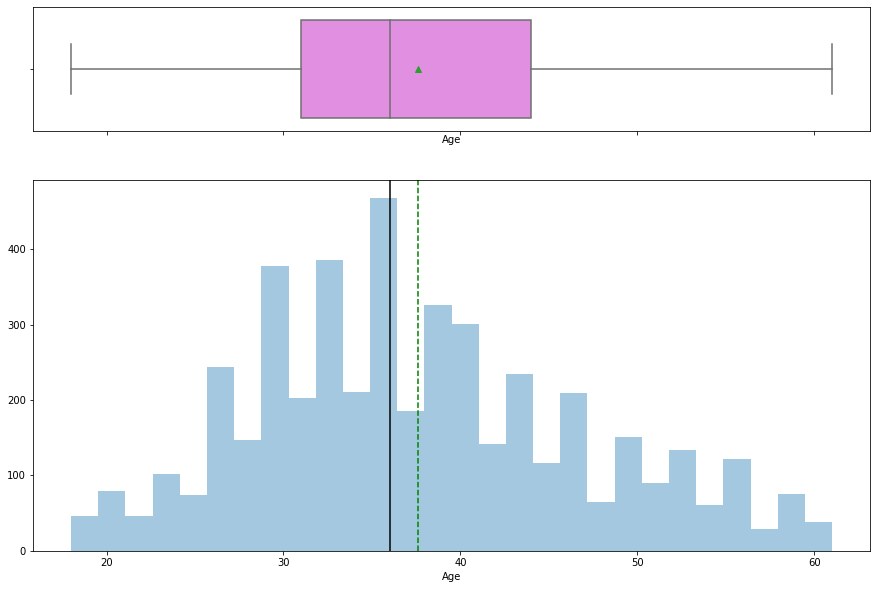

In [27]:
histogram_boxplot(data2["Age"])

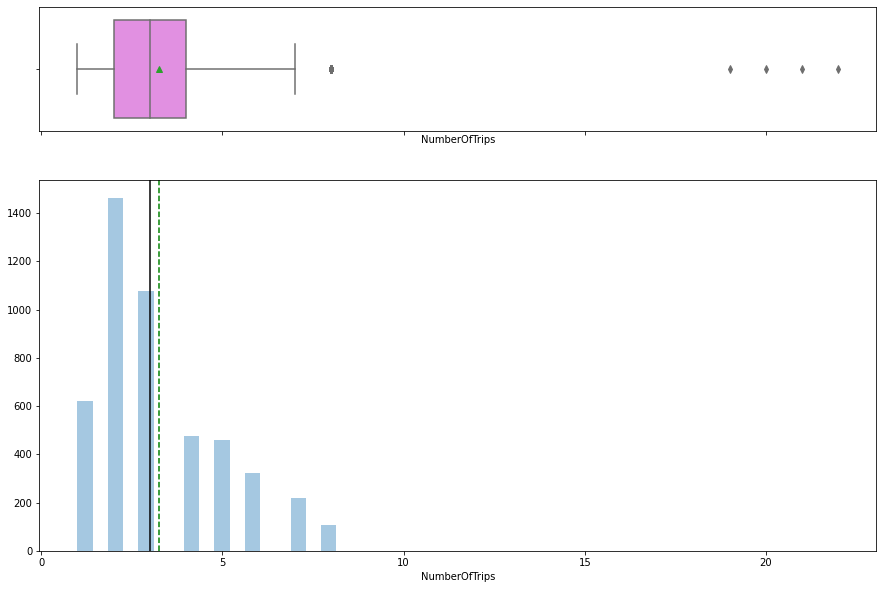

In [30]:
histogram_boxplot(data2["NumberOfTrips"])               

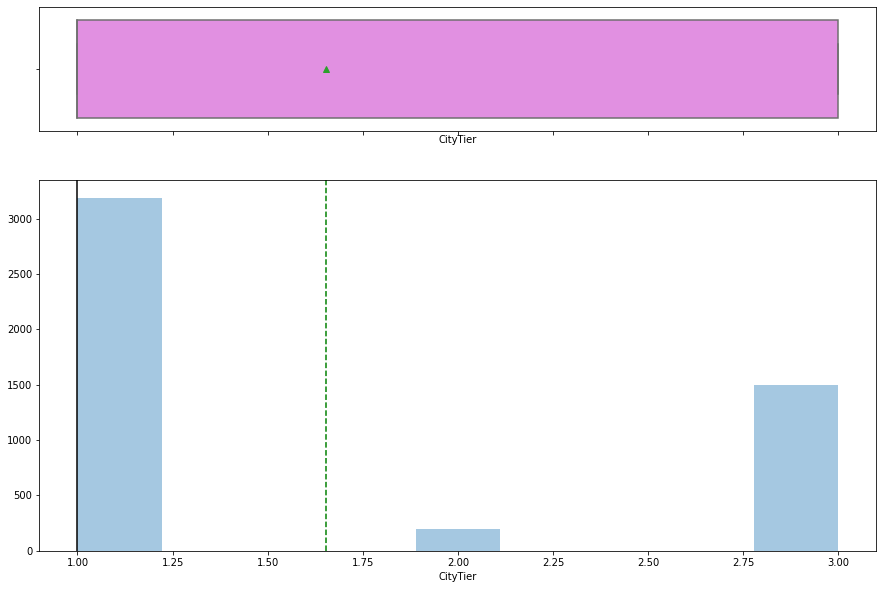

In [43]:
histogram_boxplot(data2["CityTier"])  

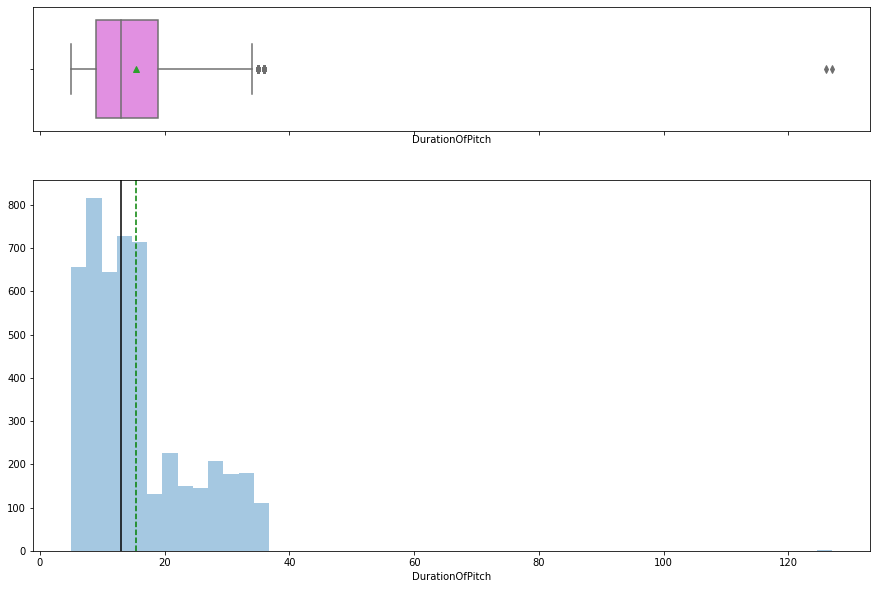

In [44]:
histogram_boxplot(data2["DurationOfPitch"])  

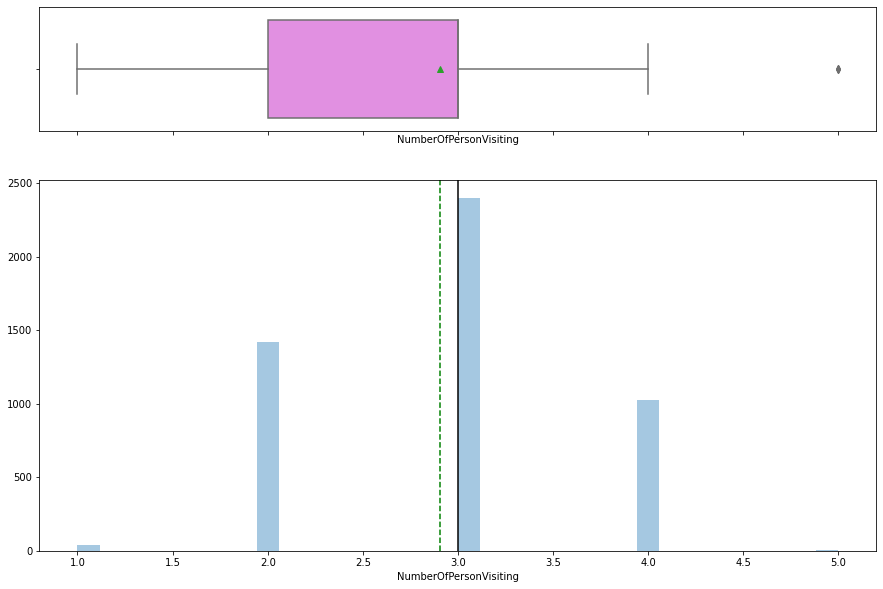

In [45]:
histogram_boxplot(data2["NumberOfPersonVisiting"])  

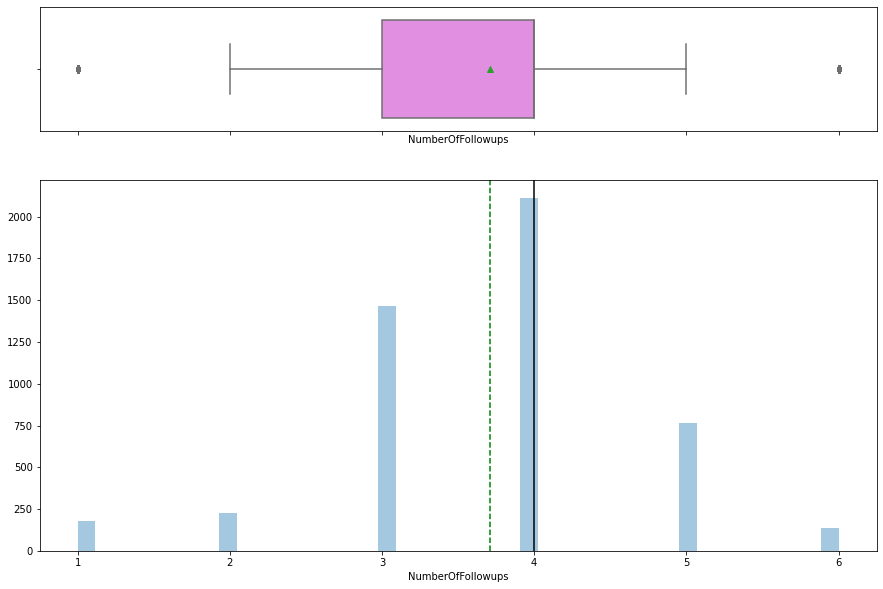

In [46]:
histogram_boxplot(data2["NumberOfFollowups"])  

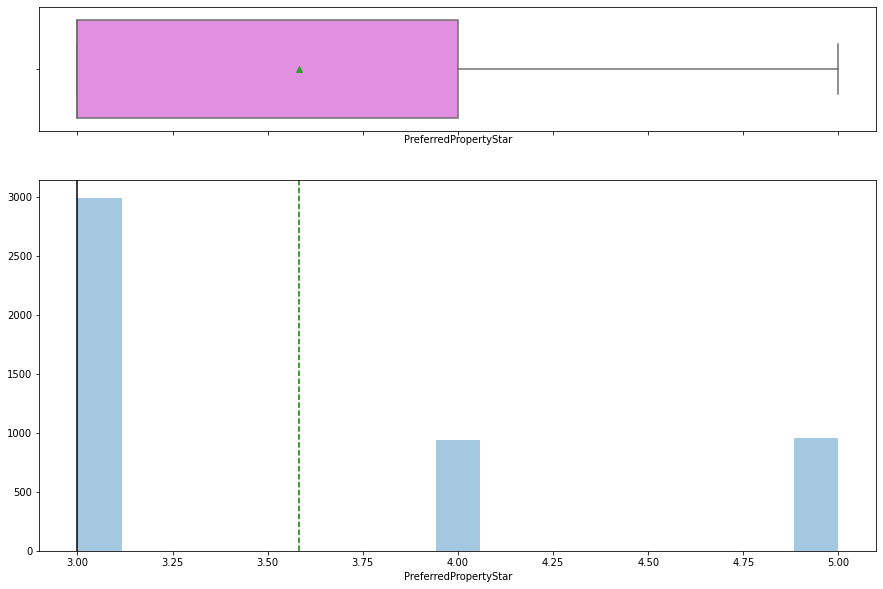

In [47]:
histogram_boxplot(data2["PreferredPropertyStar"])  

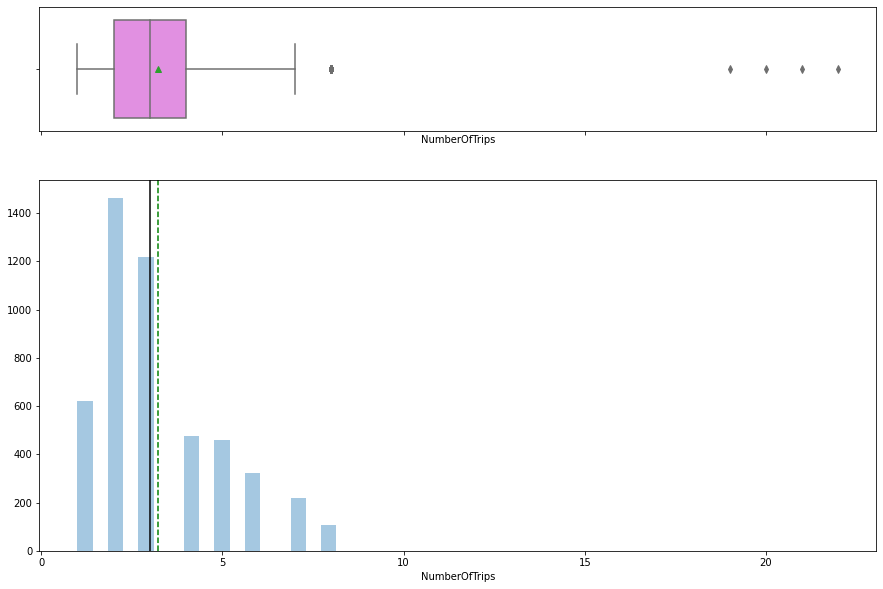

In [48]:
histogram_boxplot(data2["NumberOfTrips"])  

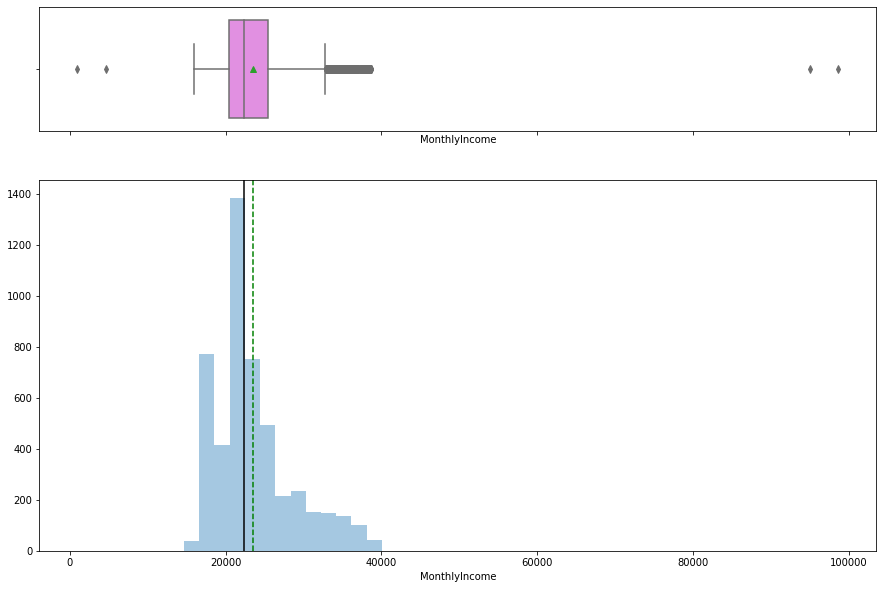

In [49]:
histogram_boxplot(data2["MonthlyIncome"])  

#### Observations: 
* There are some outliers in Monthly Income & No. of trips
*  The distribution of Monthly Income,Number of Trips, Duration of pitch is right-skewed


In [50]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

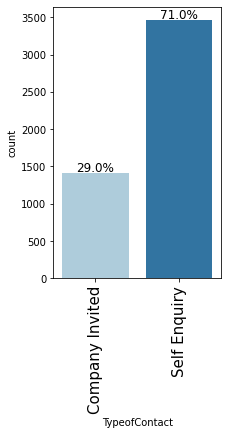

In [51]:
labeled_barplot(data2, "TypeofContact",perc=True)

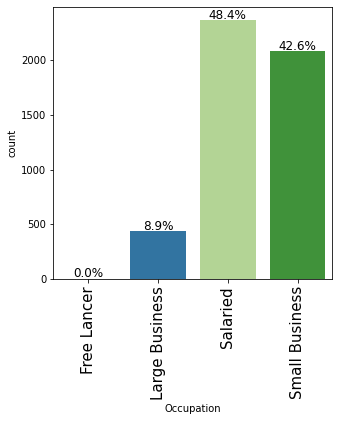

In [52]:
labeled_barplot(data2, "Occupation",perc=True)

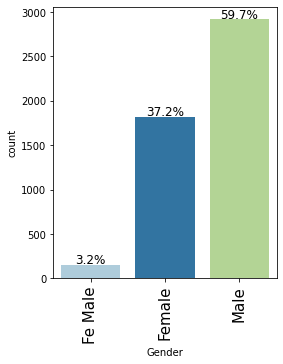

In [53]:
labeled_barplot(data2, "Gender",perc=True)

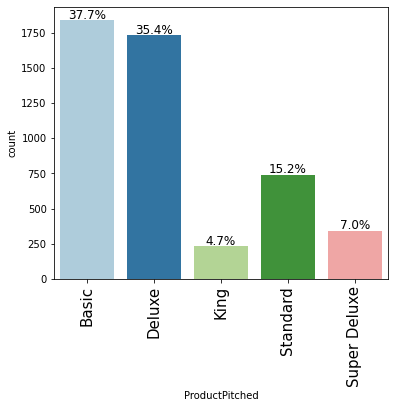

In [54]:
labeled_barplot(data2, "ProductPitched",perc=True)

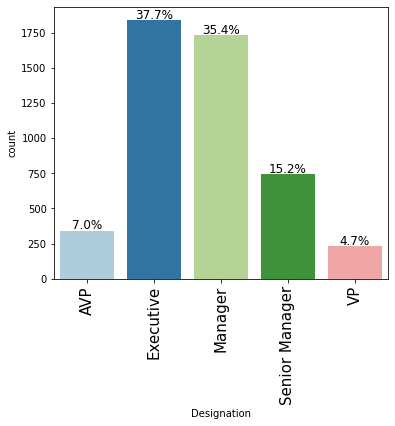

In [55]:
labeled_barplot(data2, "Designation",perc=True)

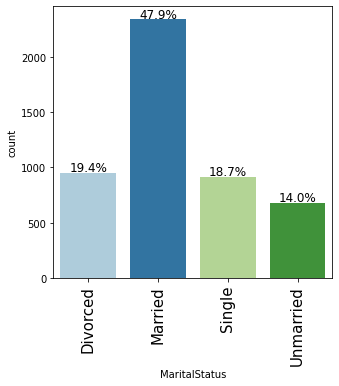

In [56]:
labeled_barplot(data2, "MaritalStatus",perc=True)

#### Observation : 
*  Majority of the designation are either Manager or Executive


### Bivariate analysis

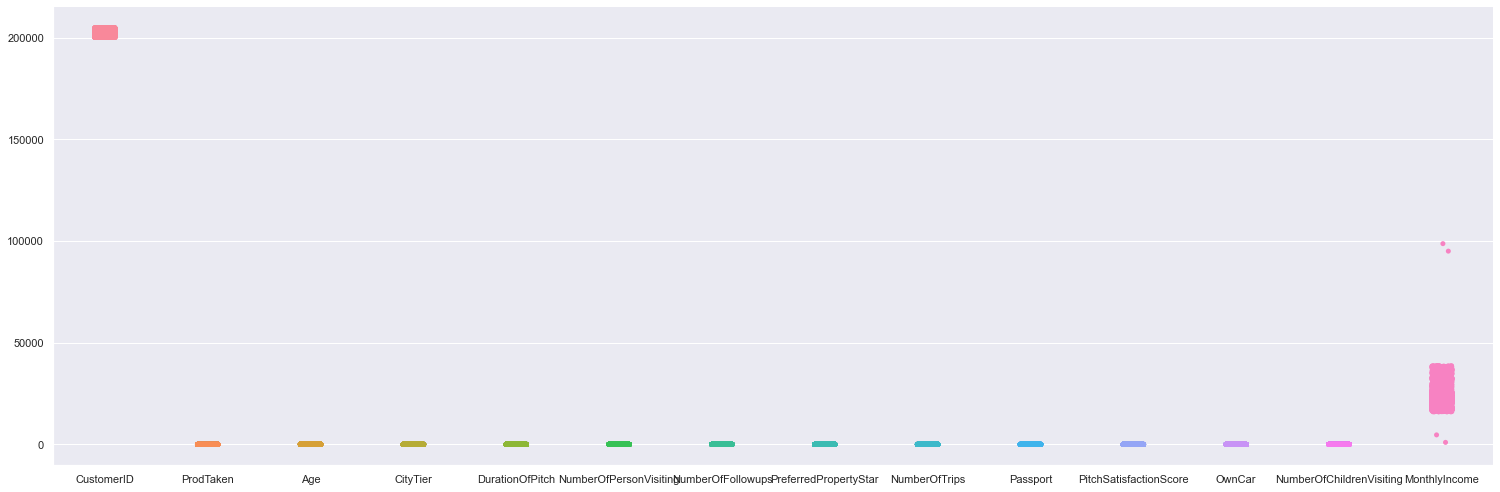

In [59]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(data=data2, height=7, aspect=3);

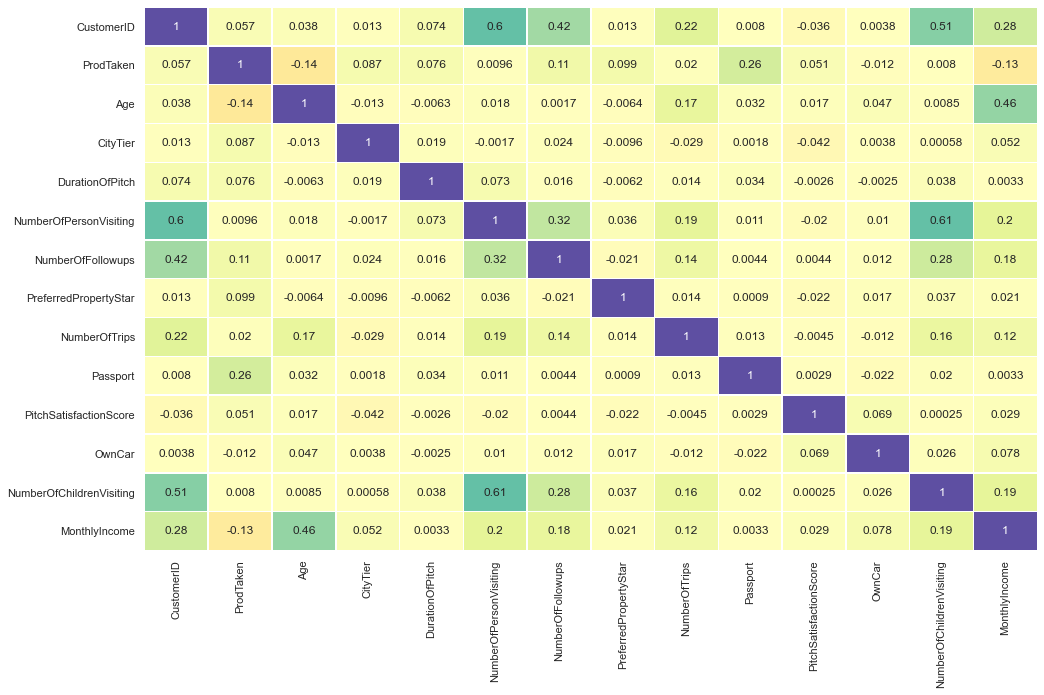

In [61]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

### Observation :
* There is a  correalation between NoofChidrenVIsiting & NoofPersonsvisiting but it is not strong enough to be dropped.

In [63]:
oneHotCols=["Occupation", "TypeofContact", "Gender", "ProductPitched", "MaritalStatus", "Designation"]
data2=pd.get_dummies(data2, columns=oneHotCols)
data2.head(10)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,...,0,0,0,1,0,0,0,1,0,0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,...,0,1,0,0,0,0,0,1,0,0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,1,0,0,1,0,0,0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,...,0,1,0,0,0,0,1,0,0,0
4,200004,0,36.0,1,8.0,2,3.0,4.0,1.0,0,...,0,1,0,0,0,0,1,0,0,0
5,200005,0,32.0,1,8.0,3,3.0,3.0,1.0,0,...,0,0,0,1,0,0,1,0,0,0
6,200006,0,59.0,1,9.0,2,2.0,5.0,5.0,1,...,0,1,0,0,0,0,1,0,0,0
7,200007,0,30.0,1,30.0,3,3.0,3.0,2.0,0,...,0,0,1,0,0,0,1,0,0,0
8,200008,0,38.0,1,29.0,2,4.0,3.0,1.0,0,...,0,0,0,0,1,0,0,0,1,0
9,200009,0,36.0,1,33.0,3,3.0,3.0,7.0,0,...,0,1,0,0,0,0,0,1,0,0


In [64]:
data2.drop(columns=['CustomerID'], inplace=True)

### <a id='link1'>Summary of EDA</a>

*  There are some outliers in Monthly Income & No. of trips
*  The distribution of Monthly Income,Number of Trips, Duration of pitch is right-skewed
*  There is a correalation between NoofChidrenVIsiting & NoofPersonsvisiting but it is not strong enough to be dropped.
*  CustomerID is dropped.


## Split the data into train and test sets

In [65]:
X = data2.drop("ProdTaken" , axis=1)
y = data2.pop("ProdTaken")

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [67]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [68]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will purchase a package in reality the customer will not purchase a package. - Loss of resources

2. Predicting a customer will not purchase a package in reality the customer will  purchase a package. - Loss of opportunity

### Which case is more important? 

* Predicting a customer will not purchase a package in reality the customer will  purchase a package.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

## Building the model for Bagging
- We are going to build 3 ensemble models here - Bagging Classifier , Random Forest Classifier, Decision Tree Classifier.

### Bagging Classifier

In [69]:
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

In [70]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9947383805904706
Accuracy on test set :  0.9079754601226994
Recall on training set :  0.9736024844720497
Recall on test set :  0.5942028985507246
Precision on training set :  0.9984076433121019
Precision on test set :  0.8770053475935828


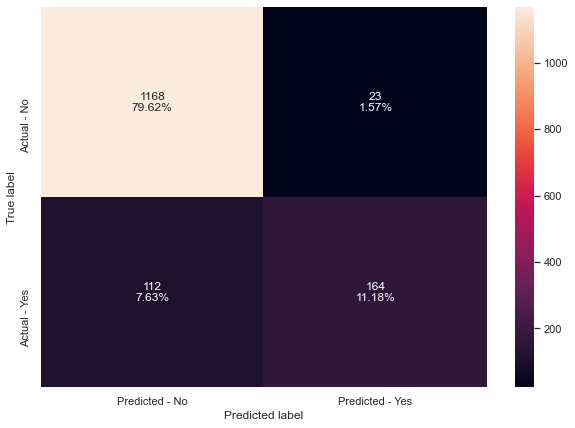

In [71]:
make_confusion_matrix(bagging_estimator,y_test)

### Random Forest Classifier

In [72]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [73]:
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9079754601226994
Recall on training set :  1.0
Recall on test set :  0.5543478260869565
Precision on training set :  1.0
Precision on test set :  0.9272727272727272


* The decision tree is overfitting the training data.

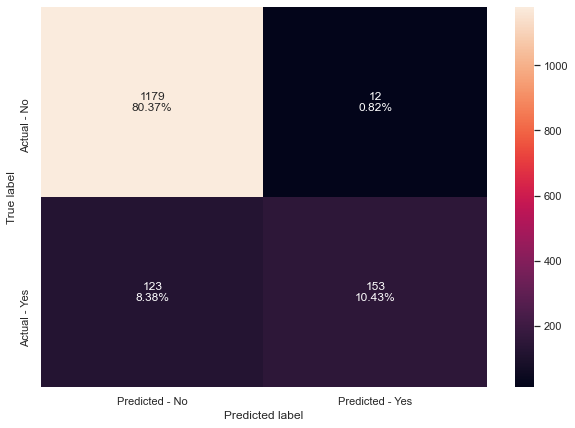

In [74]:
make_confusion_matrix(rf_estimator,y_test)

### Decision Tree Classifier

In [75]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [76]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.8916155419222904


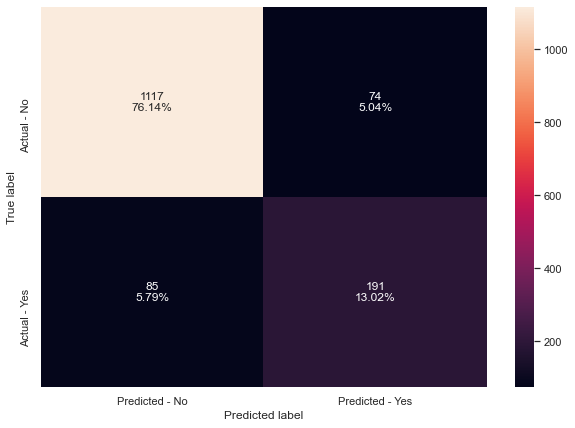

In [77]:
make_confusion_matrix(dTree,y_test)

In [78]:
dTree_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8916155419222904
Recall on training set :  1.0
Recall on test set :  0.6920289855072463
Precision on training set :  1.0
Precision on test set :  0.720754716981132


**With default parameters:**

- Both models - Bagging classifiers as well as random forest classifier & Decision Tree are overfitting the train data.
- All models are giving similar performance in terms of accuracy but Decision TRee classifier is giving better recall.

## Hyperparameter Tuning

### Bagging Classifier

In [79]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [80]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9175187457396047
Recall on training set :  0.9984472049689441
Recall on test set :  0.6195652173913043
Precision on training set :  1.0
Precision on test set :  0.9144385026737968


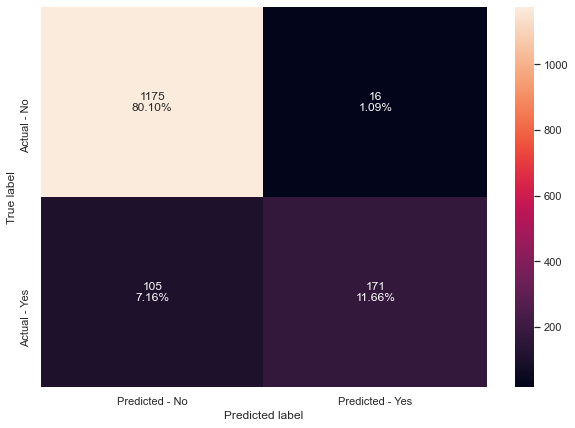

In [81]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Insights
- We can see that train accuracy and recall for the tuned bagging classifier have increased slightly after hyperparameter tuning but the test recall has decreased.
- The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and test recall.


### Random Forest Classifier

In [82]:
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=200, random_state=1)

In [83]:
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9076293481438176
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.5372670807453416
Recall on test set :  0.41304347826086957
Precision on training set :  0.9505494505494505
Precision on test set :  0.8260869565217391


### Insights
- We see after tuning the Random CLassifier the model is not overfitting anymore. 
- However We can see that accuray and more importantly the recall for the Randon Tree classifier have decreased after tuning.


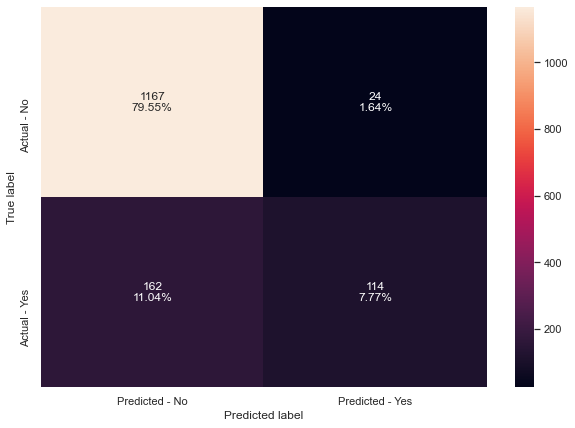

In [84]:
make_confusion_matrix(rf_estimator_tuned,y_test)

### Decision Tree Classifier

In [86]:
from sklearn.model_selection import GridSearchCV

In [88]:
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

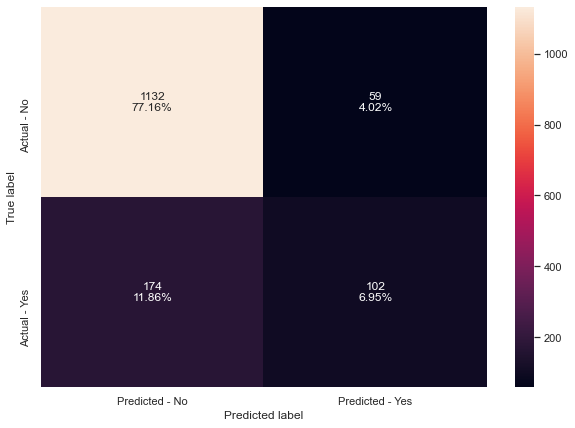

In [90]:
make_confusion_matrix(estimator,y_test)

In [91]:
dTree_estimator_score=get_metrics_score(dTree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8916155419222904
Recall on training set :  1.0
Recall on test set :  0.6920289855072463
Precision on training set :  1.0
Precision on test set :  0.720754716981132


### Insights
- We can see that train accuracy and recall for the tuned Decision Tree classifier have increased slightly after hyperparameter tuning but the test recall has decreased.
- The model is overfitting the data, as train accuracy and recall are much higher than the test accuracy and test recall.

### Checking the feature importance

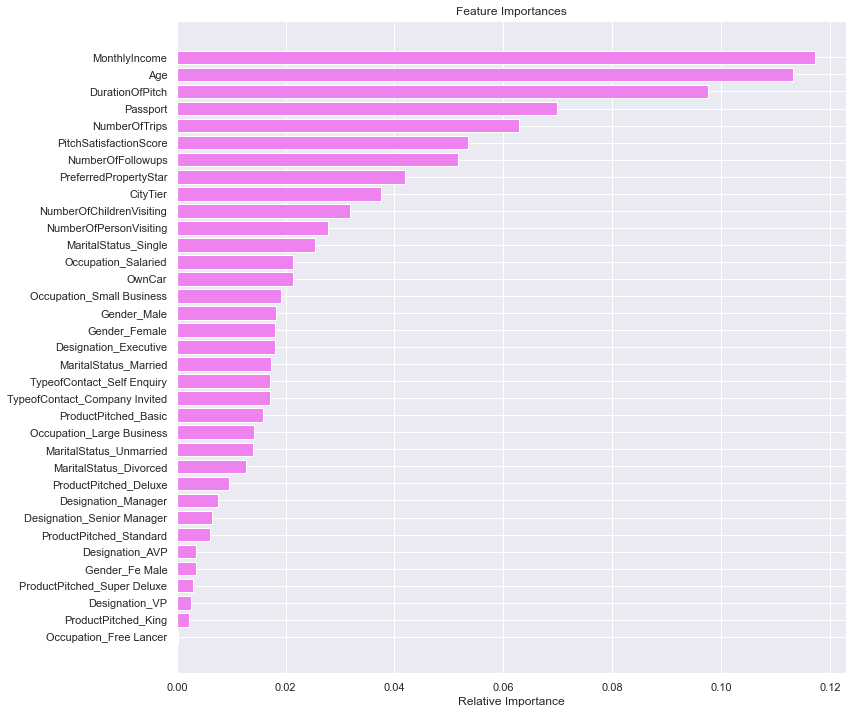

In [93]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
-Monthly Income, Age & Duration Of pitch are the most important features

### Comparing all models

In [95]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,rf_estimator,rf_estimator_tuned,dTree,estimator]
          

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [96]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                         'Random Forest with deafult parameters','Tuned Random Forest Classifier',
                                         'Decision Tree Classifier', 'Tuned Decision Tree Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,0.99,0.91,0.97,0.59,1.00,0.88
1,Tuned Bagging Classifier,1.00,0.92,1.00,0.62,1.00,0.91
2,Random Forest with deafult parameters,1.00,0.91,1.00,0.55,1.00,0.93
3,Tuned Random Forest Classifier,0.91,0.87,0.54,0.41,0.95,0.83
4,Decision Tree Classifier,1.00,0.89,1.00,0.69,1.00,0.72
5,Tuned Decision Tree Classifier,0.82,0.84,0.34,0.37,0.54,0.63


### Summary:
- Decision Tree CLassifier had the best recall score 
- After tuning Random Forest and Decisiton tree classifiers were no longer over fitting the model.
- Bagging Classifier continued to overfit the model even after hypertuning

## Building the model for Boosting
- We are going to build 4 ensemble models here - Adaboost, GradientBoost, XGBoost, and Stacking classifiers.

### AdaBoost Classifier

In [97]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [98]:
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8447822274188833
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.31832298136645965
Recall on test set :  0.32608695652173914
Precision on training set :  0.6902356902356902
Precision on test set :  0.7258064516129032


### Insights
- We can see that train and test score are very similar which suggest model is not overfitting.
- The performacne of the model specifically the recall score is very low which suggest possible hyper tuning may be required. 

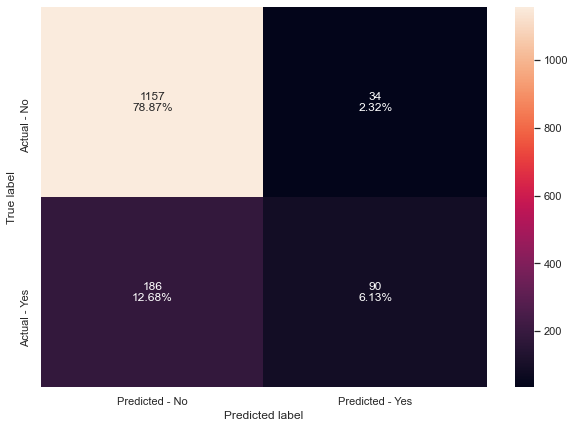

In [99]:
make_confusion_matrix(abc,y_test)

### Gradient Boosting Classifier

In [100]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [101]:
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.8842443729903537
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.4394409937888199
Recall on test set :  0.39492753623188404
Precision on training set :  0.889937106918239
Precision on test set :  0.8014705882352942


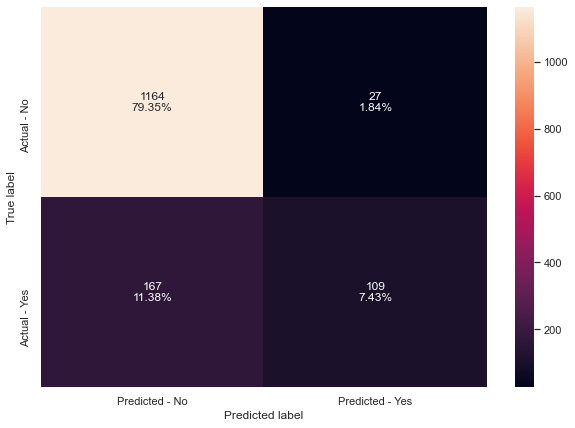

In [102]:
make_confusion_matrix(gbc,y_test)

### Insights
- We can see that train and test score are very similar which suggest model is not overfitting.
- The performacne of the model is better than Adaboosting but the recall score is still low which suggest possible hyper tuning may be required. 

### XGBoost Classifier

In [103]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [104]:
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9202453987730062
Recall on training set :  0.9984472049689441
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.8697674418604651


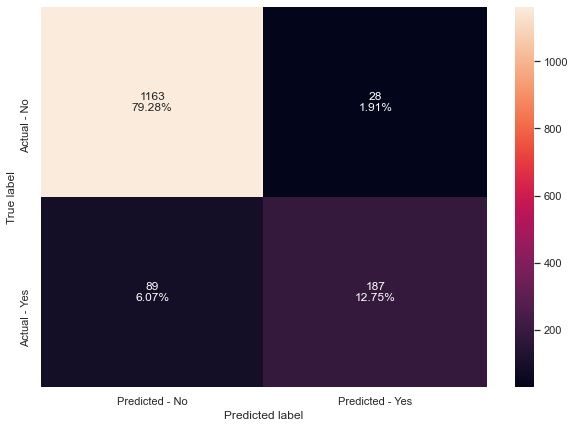

In [105]:
make_confusion_matrix(xgb,y_test)

### Insights
- The model took a long time to train but the performacne of the model was the best  of the 3.
- However the recall is score  for train and test are not very similar which might suggest some overfitting . 

## Hyperparameter Tuning

### AdaBoost Classifier

In [107]:
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=1.1, n_estimators=100, random_state=1)

In [108]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9871382636655949
Accuracy on test set :  0.8718473074301295
Recall on training set :  0.9440993788819876
Recall on test set :  0.5905797101449275
Precision on training set :  0.987012987012987
Precision on test set :  0.6848739495798319


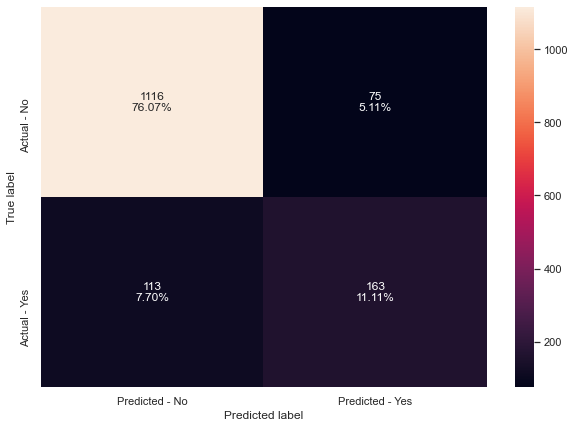

In [109]:
make_confusion_matrix(abc_tuned,y_test)

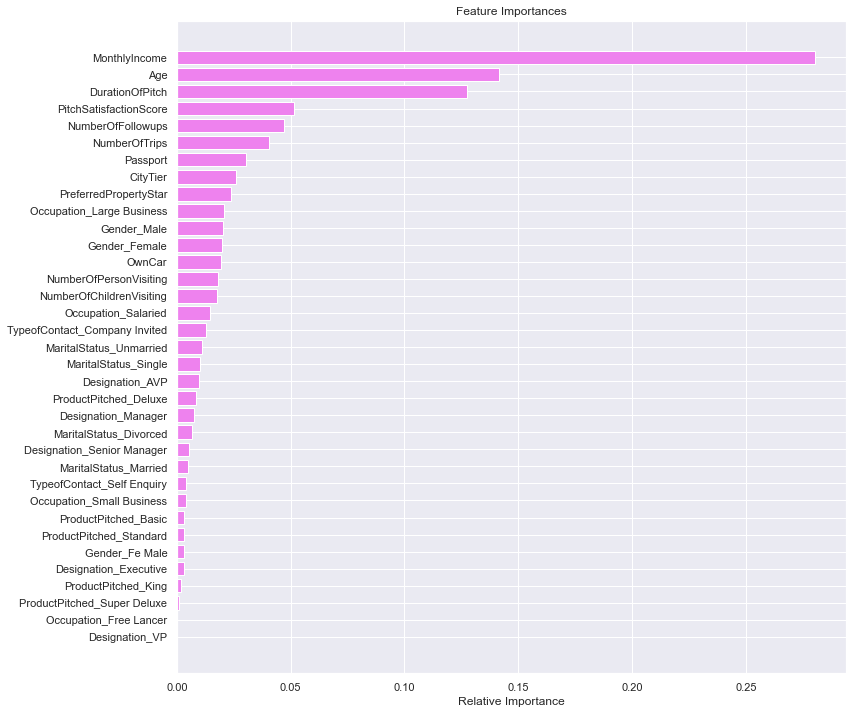

In [110]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- The performacne of the model is better with tuning.
- We still see some overfitting with the recall score oof train vs test

### Gradient Boosting Classifier

In [111]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [112]:
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8865828705057001
Accuracy on test set :  0.869120654396728
Recall on training set :  0.4549689440993789
Recall on test set :  0.4057971014492754
Precision on training set :  0.8878787878787879
Precision on test set :  0.8


In [113]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,200],
    "subsample":[0.8,1],
    "max_features":[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=0.8)

In [114]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.91581408944753
Accuracy on test set :  0.8820722563053851
Recall on training set :  0.5978260869565217
Recall on test set :  0.4855072463768116
Precision on training set :  0.9299516908212561
Precision on test set :  0.8121212121212121


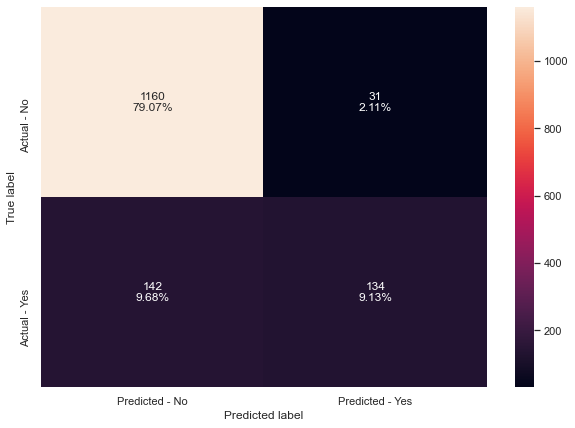

In [115]:
make_confusion_matrix(gbc_tuned,y_test)

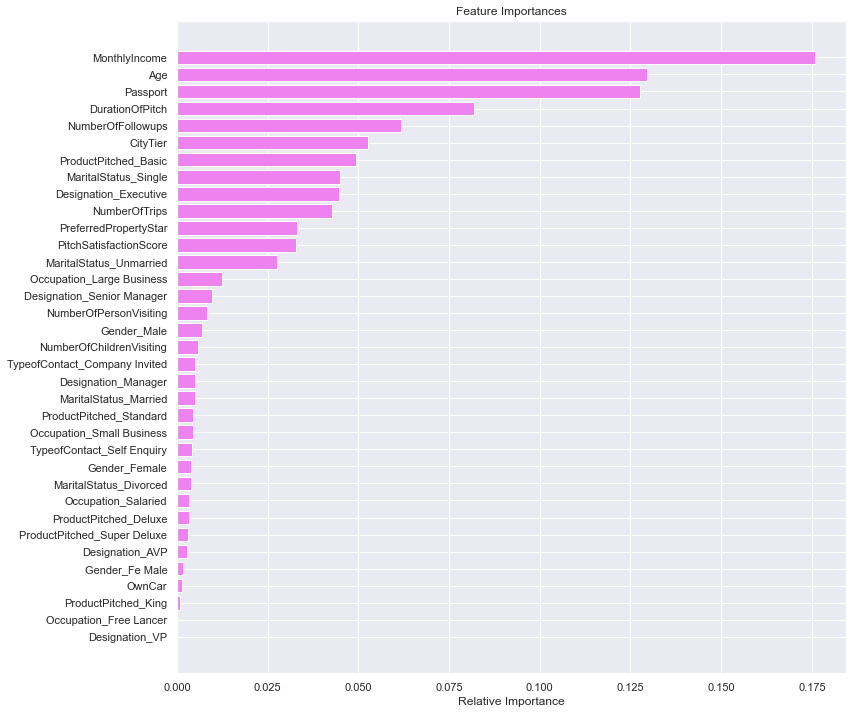

In [116]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- The performacne of the model is better with tuning.
- We still see some overfitting with the recall score oof train vs test

### XGBoost Classifier

In [119]:
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,20),
    "scale_pos_weight":[0,3],
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.01,0.05],
    "gamma":[0,3],
    "colsample_bytree":[0.5,1],
    "colsample_bylevel":[0.5,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=14, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=3, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [120]:
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.8737211341712949
Accuracy on test set :  0.863667348329925
Recall on training set :  0.6972049689440993
Recall on test set :  0.6231884057971014
Precision on training set :  0.6545189504373178
Precision on test set :  0.6417910447761194


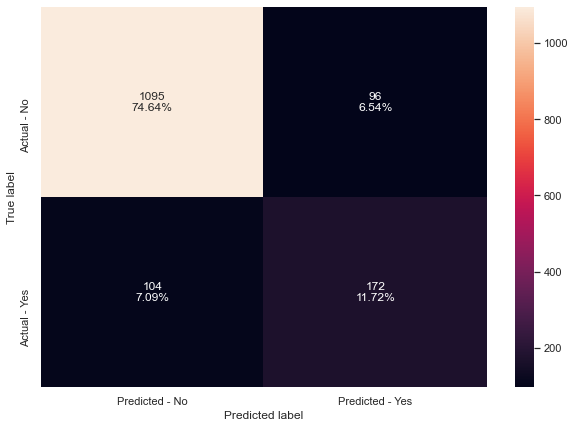

In [121]:
make_confusion_matrix(xgb_tuned,y_test)

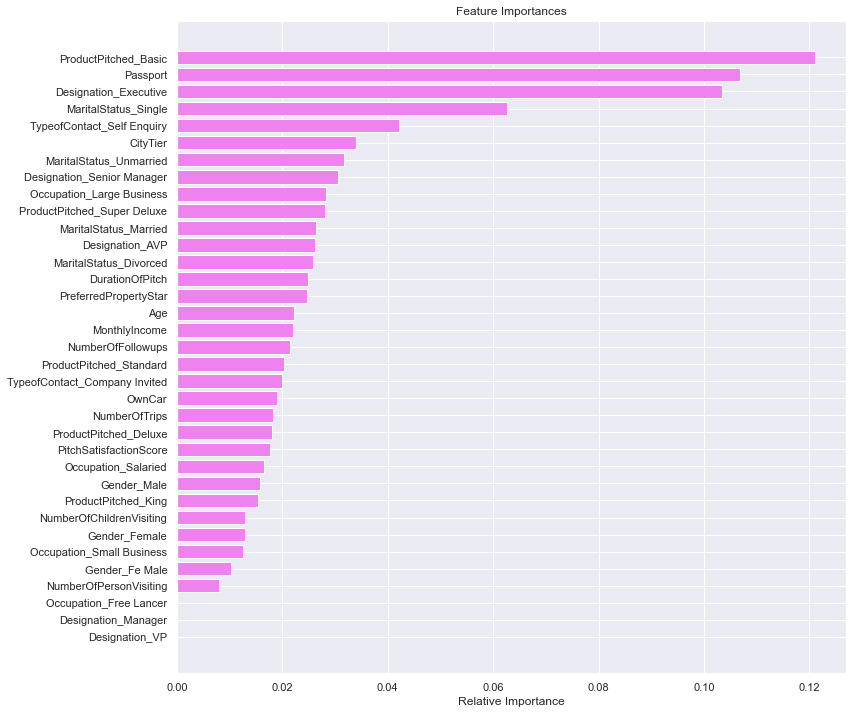

In [122]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insights
- The performacne of the model is slightly worse with tuning.
- The recall score has decreased with hyper tuning.
- The most important field is Product pitched which is diferrent from all the other classifiers (Monthly Income)

## Stacking Model

In [137]:
from sklearn.ensemble import StackingClassifier
estimators = [('Random Forest',rf_estimator_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features=0.6000000000000001,
                                                       max_samples=0.6000000000000001,
                                                       min_samples_leaf=5,
                                                       n_estimators=200,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tr...
                                                 

Accuracy on training set :  0.9286758257819351
Accuracy on test set :  0.858214042263122
Recall on training set :  0.9642857142857143
Recall on test set :  0.8514492753623188
Precision on training set :  0.7375296912114014
Precision on test set :  0.5845771144278606


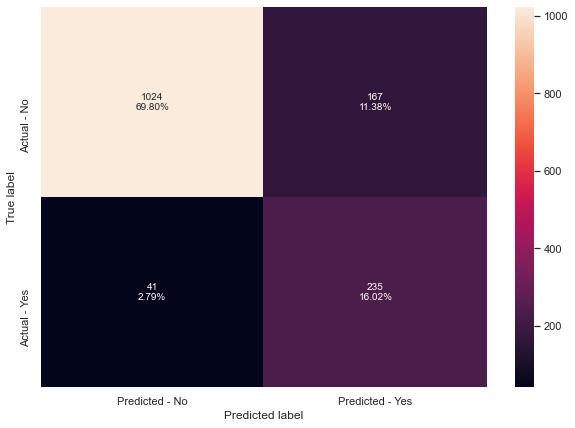

In [145]:

stacking_classifier_model_test_perf=get_metrics_score(stacking_classifier)


#Creating confusion matrix
make_confusion_matrix(stacking_classifier,y_test)

### Insights
- The performacne of the model improved a lot after using stacking classifier
- There was no overfitting of the model 

## Comparing all models

In [147]:
models = [abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned,stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [149]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','Stacking Classifier'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame


,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,0.84,0.85,0.32,0.33,0.69,0.73
1,AdaBoost Tuned,0.99,0.87,0.94,0.59,0.99,0.68
2,Gradient Boosting with default parameters,0.88,0.87,0.44,0.39,0.89,0.80
3,Gradient Boosting Tuned,0.92,0.88,0.60,0.49,0.93,0.81
4,XGBoost with default parameters,1.00,0.92,1.00,0.68,1.00,0.87
5,XGBoost Tuned,0.87,0.86,0.70,0.62,0.65,0.64
6,Stacking Classifier,0.93,0.86,0.96,0.85,0.74,0.58


## Final Summary
- Based on our analysis, we can say that the customer profile who are likely to buy the travel package has the following features: 
    - Higher monthyly Income.
    - The younger the customer is the more likely they are to purchase the package. 
    - Executives are more likely to purchase the package .
    - Customers who are Single are more likely to purchase the package. .
    - 
- About the models :
    - The Stacking Classifier has the performance from bith Bagging and Boosting methods. 
    - The Bagging Classifiers were overfitting the models more than the boosting models.